In [3]:
!nvidia-smi

Tue May  2 10:49:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics==8.0.86  
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 83.7M/83.7M [00:00<00:00, 99.0MB/s]
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

100% 104k/104k [00:00<00:00, 5.69MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 2 dogs, 2 backpacks, 118.3ms
Speed: 0.7ms preprocess, 118.3ms inference, 298.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


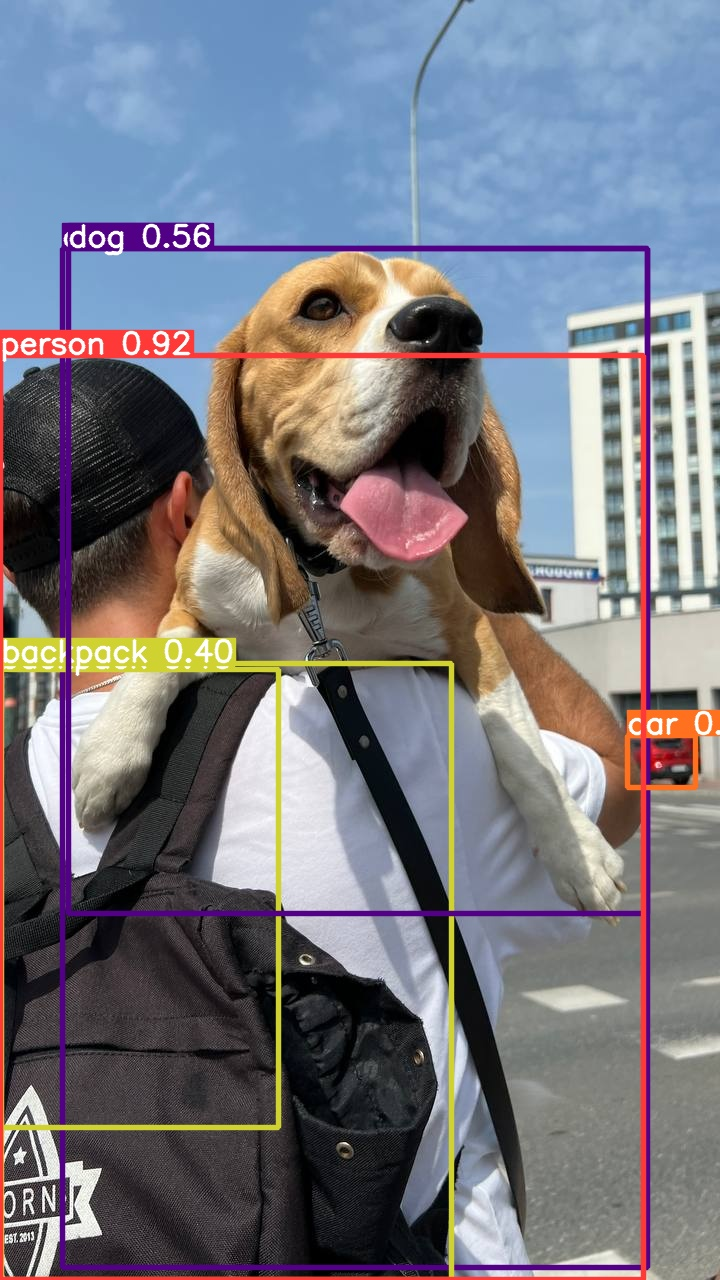

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.86, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to ProjectUrine2-1 in yolov8:: 100%|██████████| 1680/1680 [00:00<00:00, 1843.95it/s]


In [2]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=290 batch=16 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
New https://pypi.org/project/ultralytics/8.0.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ProjectUrine2-1/data.yaml, epochs=290, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize

In [3]:
!ls /content/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1683024852.bca605b93e79.2688.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights
results.png


[Errno 2] No such file or directory: '{HOME}'
/content


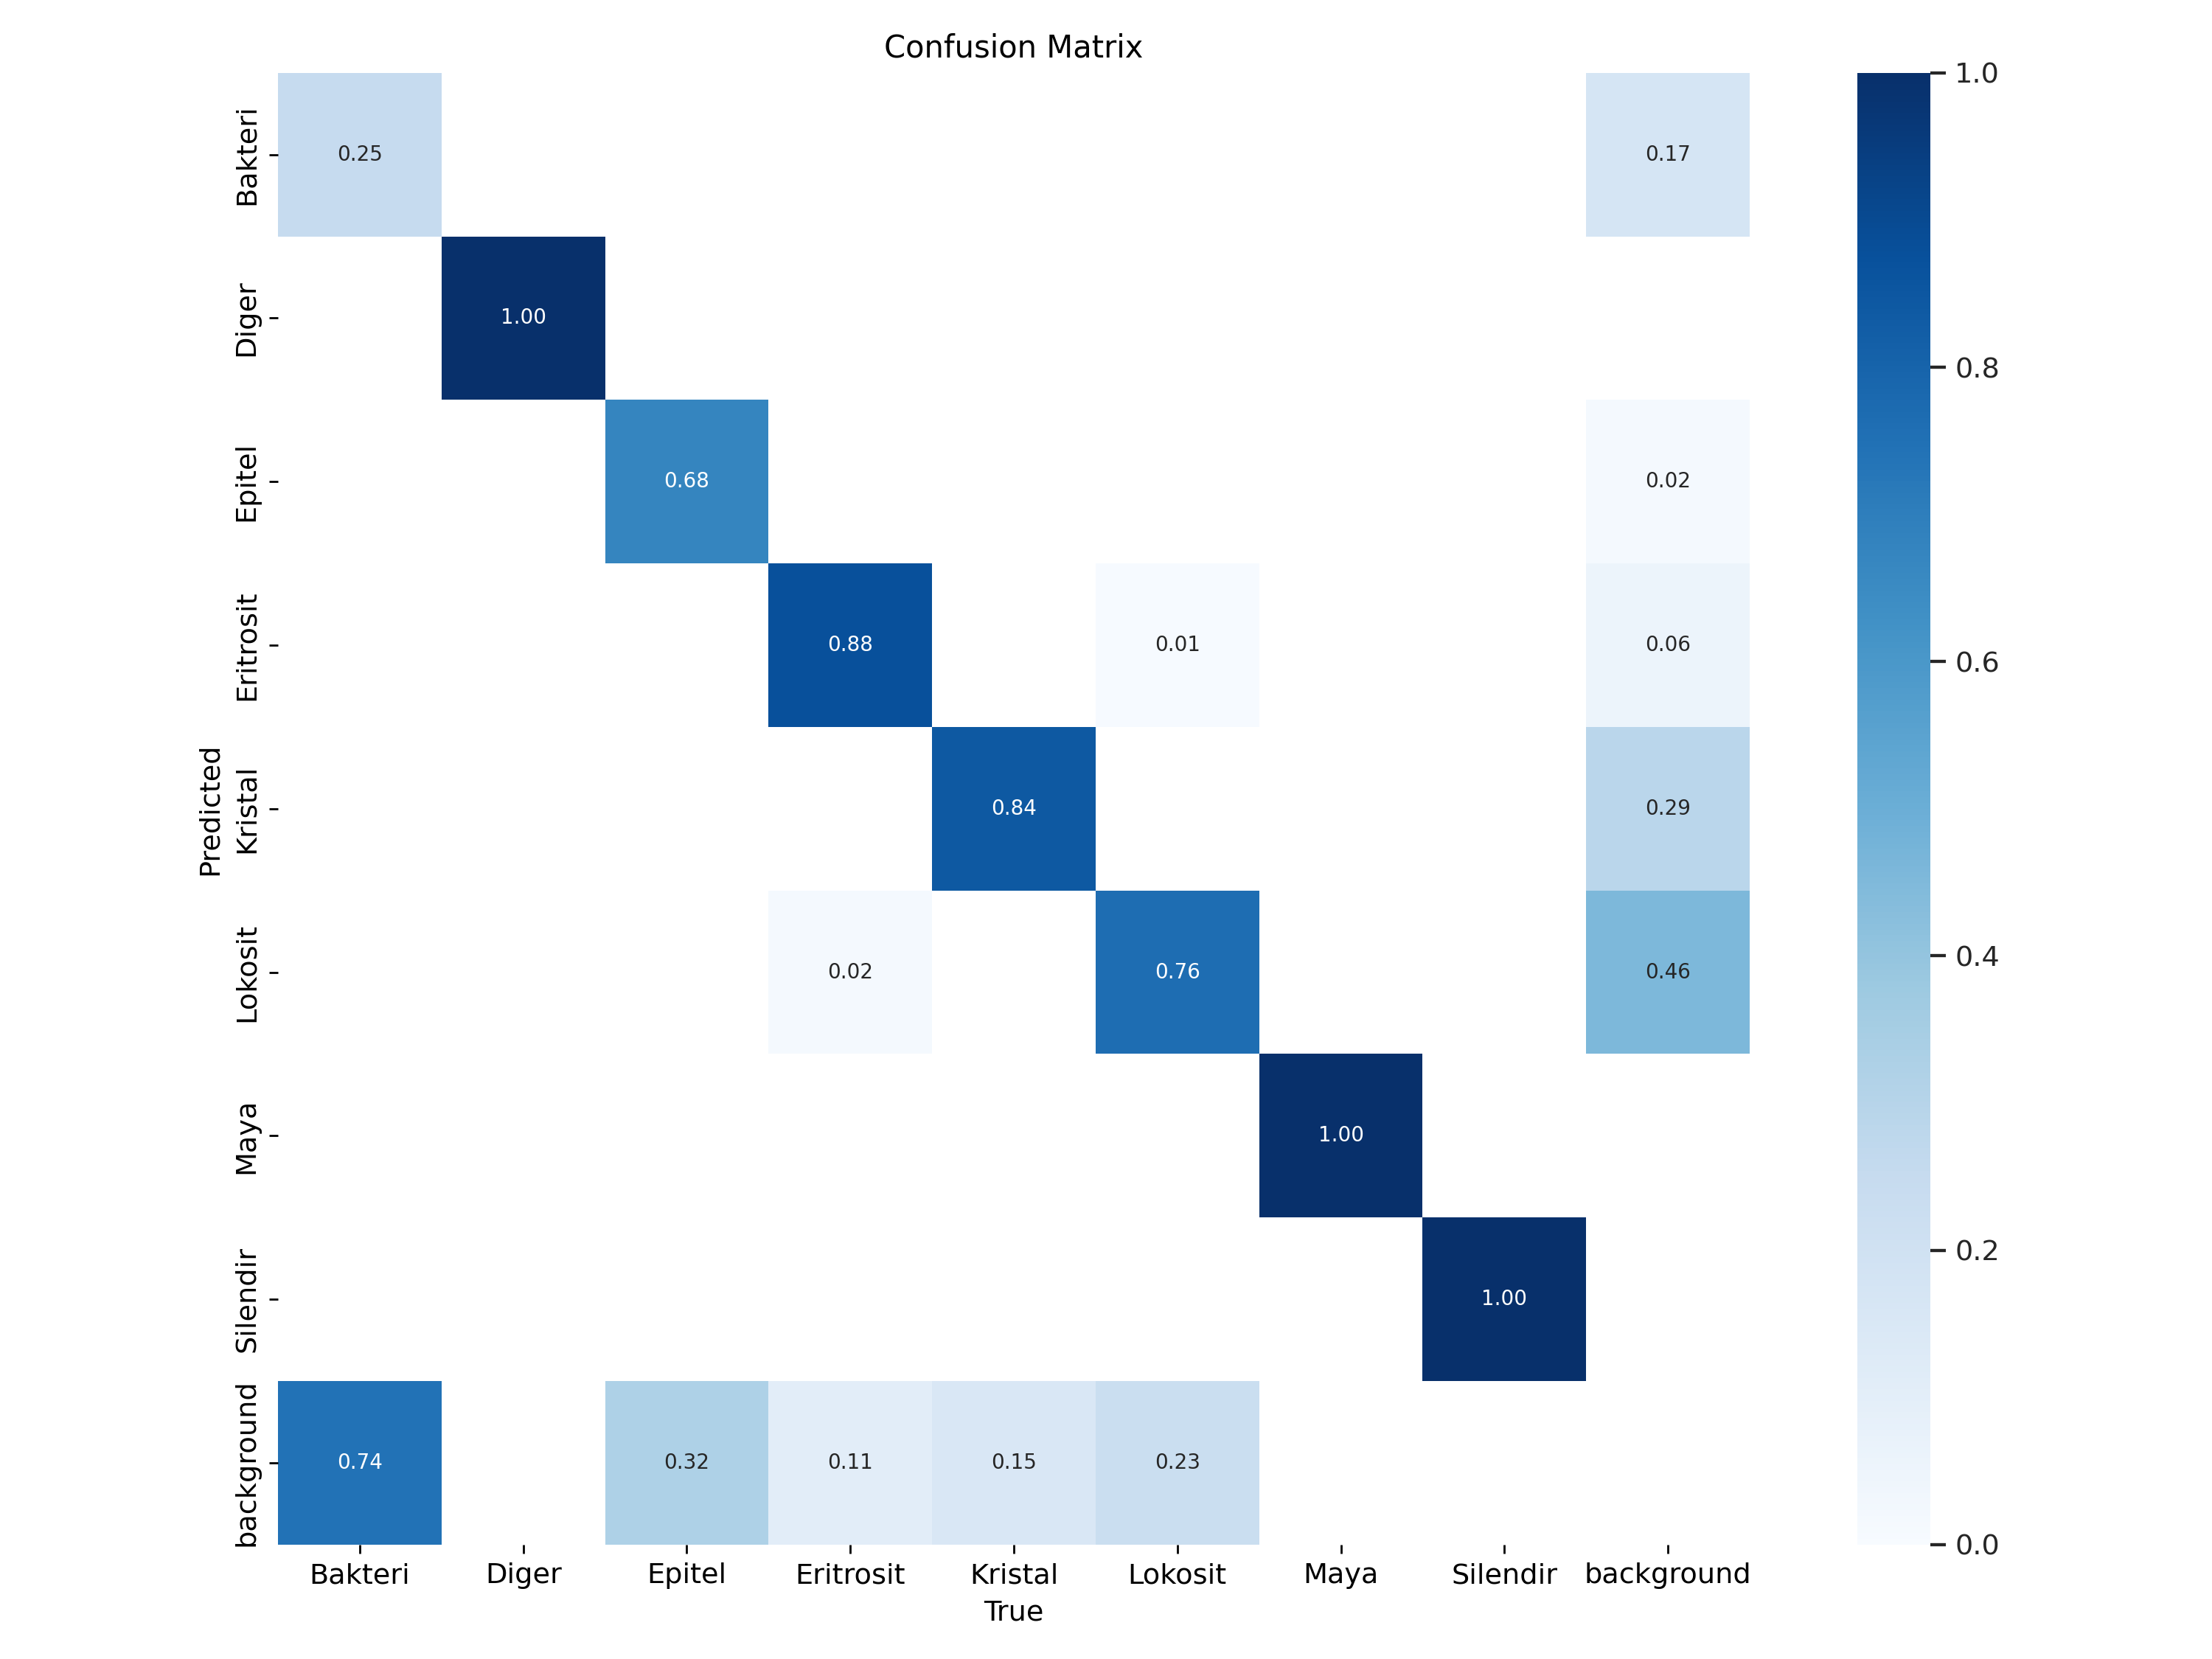

In [6]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


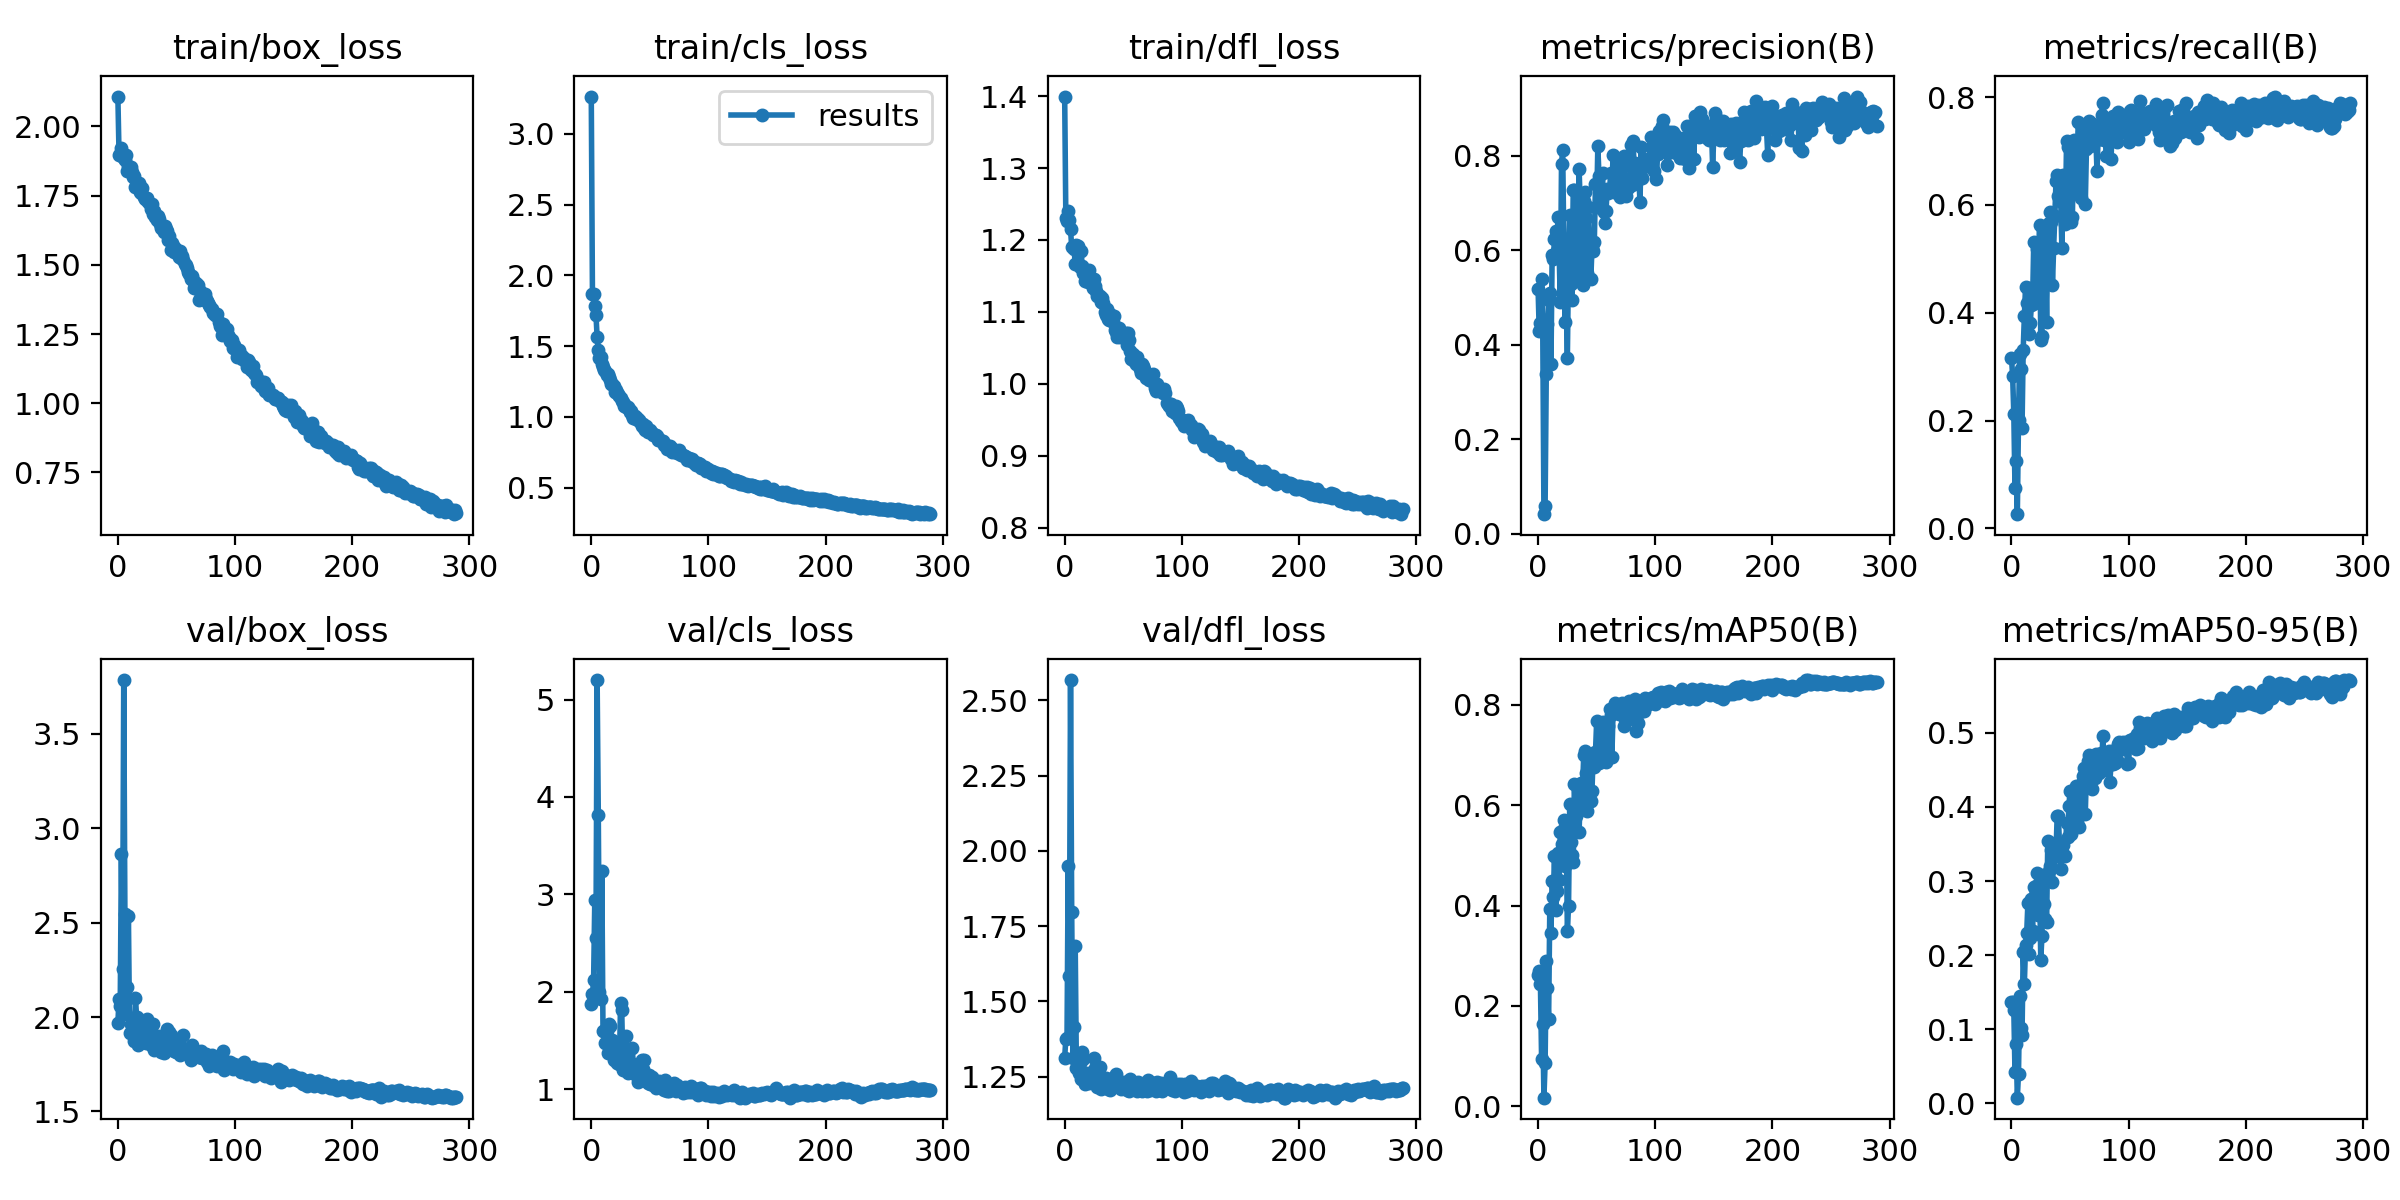

In [7]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ProjectUrine2-1/valid/labels.cache... 83 images, 0 backgrounds, 0 corrupt: 100% 83/83 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:15<00:00,  2.51s/it]
                   all         83       1706      0.896      0.775      0.846      0.571
               Bakteri         83        304      0.807      0.201      0.268      0.147
                 Diger         83          2      0.794          1      0.995      0.803
                Epitel         83        114      0.957      0.592       0.86      0.598
             Eritrosit         83        244      0.962      0.869      0.956      0.542
               Kristal         83        620      0.903      0.818      0.901    

In [ ]:
# tahmin-test etmek için 

In [9]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/42 /content/ProjectUrine2-1/test/images/0002_jpg.rf.51ac6e2bd8d9f64741f57ab95591601a.jpg: 640x640 5 Silendirs, 62.9ms
image 2/42 /content/ProjectUrine2-1/test/images/0019_jpg.rf.37c90e0be4d32c1a38afce3efcfe263e.jpg: 640x640 1 Silendir, 39.0ms
image 3/42 /content/ProjectUrine2-1/test/images/10010_jpg.rf.dffc632020f6db0b3f9aaafcd9bc03a6.jpg: 640x640 1 Diger, 38.5ms
image 4/42 /content/ProjectUrine2-1/test/images/20017_jpg.rf.6314fc5fd1442a2db48680bb90400840.jpg: 640x640 5 Epitels, 4 Lokosits, 38.4ms
image 5/42 /content/ProjectUrine2-1/test/images/20018_jpg.rf.7f77c81945108ede2bafcae1cdea7c5d.jpg: 640x640 3 Epitels, 2 Eritrosits, 6 Lokosits, 31.7ms
image 6/42 /content/ProjectUrine2-1/test/images/20019_jpg.rf.d6f2820f8fb0219d8c6b6849c8bc9868.jpg: 640x640 3 Epit

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/1.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [11]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/1.jpg save=True

/content
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/1.jpg: 640x640 5 Silendirs, 63.8ms
Speed: 0.8ms preprocess, 63.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


/content


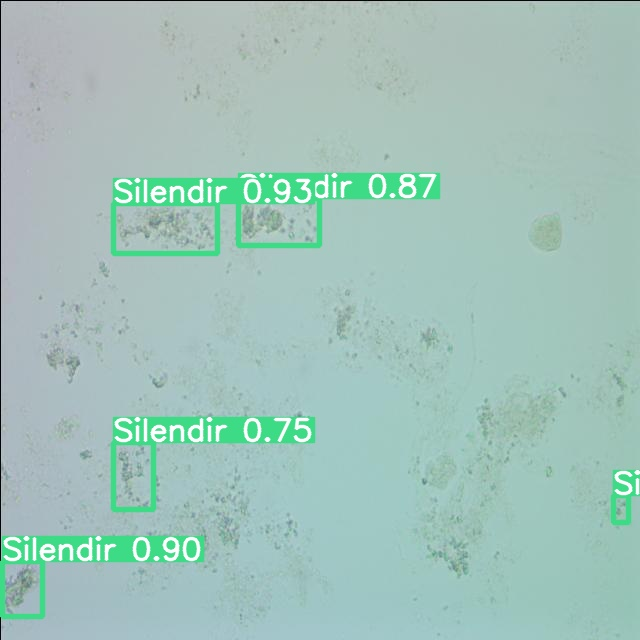

In [14]:
%cd /content
Image(filename='runs/detect/predict3/1a_yolov8l.jpg', height=600)

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/83 /content/ProjectUrine2-1/valid/images/0001_jpg.rf.4d9ad5fbdc05a602027caaa8351e44ad.jpg: 640x640 2 Silendirs, 57.8ms
image 2/83 /content/ProjectUrine2-1/valid/images/0003_jpg.rf.ad689f2f28730757abf282de286e90ac.jpg: 640x640 1 Silendir, 50.2ms
image 3/83 /content/ProjectUrine2-1/valid/images/0007_jpg.rf.6ec6ce155be9897fa73fa3dae6ba2ff4.jpg: 640x640 1 Silendir, 50.2ms
image 4/83 /content/ProjectUrine2-1/valid/images/0010_jpg.rf.71d166ee9f3af2fd1c898e4516b50902.jpg: 640x640 2 Silendirs, 36.3ms
image 5/83 /content/ProjectUrine2-1/valid/images/0012_jpg.rf.965cfe7045650418e58aed77fa4b4563.jpg: 640x640 2 Silendirs, 35.3ms
image 6/83 /content/ProjectUrine2-1/valid/images/0015_jpg.rf.804100e79373e5b1e7a8eea34d272eea.jpg: 640x640 2 Silendirs, 34.9ms
image 7/83 /con

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.86 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/42 /content/ProjectUrine2-1/test/images/0002_jpg.rf.51ac6e2bd8d9f64741f57ab95591601a.jpg: 640x640 5 Silendirs, 63.9ms
image 2/42 /content/ProjectUrine2-1/test/images/0019_jpg.rf.37c90e0be4d32c1a38afce3efcfe263e.jpg: 640x640 1 Silendir, 39.6ms
image 3/42 /content/ProjectUrine2-1/test/images/10010_jpg.rf.dffc632020f6db0b3f9aaafcd9bc03a6.jpg: 640x640 1 Diger, 39.5ms
image 4/42 /content/ProjectUrine2-1/test/images/20017_jpg.rf.6314fc5fd1442a2db48680bb90400840.jpg: 640x640 5 Epitels, 4 Lokosits, 39.3ms
image 5/42 /content/ProjectUrine2-1/test/images/20018_jpg.rf.7f77c81945108ede2bafcae1cdea7c5d.jpg: 640x640 3 Epitels, 2 Eritrosits, 6 Lokosits, 35.1ms
image 6/42 /content/ProjectUrine2-1/test/images/20019_jpg.rf.d6f2820f8fb0219d8c6b6849c8bc9868.jpg: 640x640 3 Epit

In [19]:
from google.colab import files
files.download('/content/runs/detect/predict4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!zip -r /content/valid /content/runs/detect/predict4

  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/60016_3_jpg.rf.d8f9686e13481de52caed3912ff36800.jpg (deflated 1%)
  adding: content/runs/detect/predict4/60002_3_jpg.rf.2bff0f84647e99b7bb81a68613b8454b.jpg (deflated 1%)
  adding: content/runs/detect/predict4/60003_2_jpg.rf.2ba7fbfdf6b87cbaa7c031c824629c3a.jpg (deflated 1%)
  adding: content/runs/detect/predict4/40015_1_jpg.rf.8fa3fce6eb115a857f7a63cea196ea21.jpg (deflated 2%)
  adding: content/runs/detect/predict4/10009_jpg.rf.9c0ea5757b3149fac8ee663f955a40cb.jpg (deflated 29%)
  adding: content/runs/detect/predict4/20030_jpg.rf.fc72f60f3f37aafb974a4bbfbe875983.jpg (deflated 10%)
  adding: content/runs/detect/predict4/40035_jpg.rf.90ed74d67b08205822ff595ac12461ff.jpg (deflated 10%)
  adding: content/runs/detect/predict4/60009_1_jpg.rf.7c355ea6f5efba7989a9504bf045f32d.jpg (deflated 6%)
  adding: content/runs/detect/predict4/0010_jpg.rf.71d166ee9f3af2fd1c898e4516b50902.jpg (deflated 10%)
  adding

In [28]:
files.download('/content/valid.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>